In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading UK inflation rates

In [9]:
# Loading the Excel file
file_path = 'API_FP.CPI.TOTL.ZG_DS2_en_excel_v2_85325.xls'
df = pd.read_excel(file_path, sheet_name='Data', skiprows=3)

# Keeping  numeric columns for years
year_columns = [col for col in df.columns if str(col).isdigit() and len(str(col)) == 4]
df_years_only = df[['Country Name', 'Country Code'] + year_columns]

# Filter for UK (GBR)
uk_inflation = df_years_only[df_years_only['Country Code'] == 'GBR']

# Transpose to long format
inflation_long = uk_inflation.melt(
    id_vars=['Country Name', 'Country Code'],
    var_name='Year',
    value_name='Inflation_Rate'
)

# Converting Year to integer and  datetime
inflation_long['Year'] = inflation_long['Year'].astype(int)
inflation_long['Year'] = pd.to_datetime(inflation_long['Year'], format='%Y')

# Dropping unnecessary columns and reset index
inflation_long = inflation_long.drop(columns=['Country Name', 'Country Code']).reset_index(drop=True)

# save
inflation_long.to_csv('UK_Inflation_Rate.csv', index=False)

# display
print("✅ UK inflation data extracted and saved as 'UK_Inflation_Rate.csv'")
inflation_long.head()

✅ UK inflation data extracted and saved as 'UK_Inflation_Rate.csv'


,Year,Inflation_Rate
0,1960-01-01,1.003576
1,1961-01-01,3.447496
2,1962-01-01,4.196499
3,1963-01-01,2.018544
4,1964-01-01,3.281587


# Loading cryptocurrency data

Open           int64
High         float64
Low            int64
Close          int64
Adj Close      int64
Volume         int64
dtype: object


In [42]:
import pandas as pd

# Load the CSV without assuming anything about data types
btc_data = pd.read_csv('BTC-GBP-Historical-Data.csv', low_memory=False)

# Show raw data sample
print("Raw data sample:")
print(btc_data.head())

# If needed, define column names explicitly
column_names = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
btc_data.columns = column_names[:len(btc_data.columns)]


# Convert 'Date' column to datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'], errors='coerce')

# Drop invalid dates
btc_data = btc_data.dropna(subset=['Date']).reset_index(drop=True)


numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in numeric_cols:
    # Replace commas and convert to float
    btc_data[col] = (
        btc_data[col].astype(str)
                      .str.replace(',', '', regex=True)
                      .replace('', 'NaN')
                      .astype(float)
    )

# Show cleaned data
print("\nCleaned data sample:")
btc_data[numeric_cols].head().applymap(type)  
print("\nFinal data sample:")
btc_data.head()

Raw data sample:
     Date  Open  High     Low  Close  Adj Close  Volume
0  May-20  2025    79   62.23     79     940.87      78
1  May-19  2025    77  683.48     80     114.80      77
2  May-18  2025    77  911.09     78      82.48      77
3  May-17  2025    77  977.57     78     850.34      77
4  May-16  2025    78   57.71     78     373.20      76

Cleaned data sample:

Final data sample:


,Date,Open,High,Low,Close,Adj Close,Volume


In [71]:
import pandas as pd

# Load Bitcoin price data
btc_data = pd.read_csv('BTC-GBP-Historical-Data.csv')

# Add year and convert to datetime
btc_data['Date'] = pd.to_datetime(btc_data['Date'].astype(str) + "-2025", format='%b-%d-%Y', errors='coerce')

# Clean and convert all numeric columns to float
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for col in numeric_cols:
    # Replace commas and convert to float
    btc_data[col] = (
        btc_data[col].astype(str)
                     .str.replace(',', '', regex=True)
                     .replace('', 'NaN')
                     .astype(float)
    )

# Show data types after cleaning
print("📊 Data types after cleaning:")
print(btc_data.dtypes)

# Save cleaned dataset
btc_data.to_csv('BTC-GBP-Cleaned.csv', index=False)
print("\n✅ Cleaned data saved as 'BTC-GBP-Cleaned.csv'")

#display table
btc_data.head()

📊 Data types after cleaning:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

✅ Cleaned data saved as 'BTC-GBP-Cleaned.csv'


,Date,Open,High,Low,Close,Adj Close,Volume
0,2025-05-20,2025.0,79.0,62.23,79.0,940.87,78.0
1,2025-05-19,2025.0,77.0,683.48,80.0,114.80,77.0
2,2025-05-18,2025.0,77.0,911.09,78.0,82.48,77.0
3,2025-05-17,2025.0,77.0,977.57,78.0,850.34,77.0
4,2025-05-16,2025.0,78.0,57.71,78.0,373.20,76.0


In [78]:
#  Load and clean Bitcoin price data
btc_data = pd.read_csv('BTC-GBP-Cleaned.csv')

# Ensure 'Date' is in datetime format
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

# Clean numeric columns if needed
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_cols:
    btc_data[col] = pd.to_numeric(btc_data[col], errors='coerce')

print("✅ Bitcoin Data Sample:")
print(btc_data.head())

#  Load and clean UK inflation data
inflation_path = 'UK_Inflation_Rate.csv'
uk_inflation = pd.read_csv(inflation_path)

# Ensure Year is datetime and extract year only
uk_inflation['Year'] = pd.to_datetime(uk_inflation['Year'])
uk_inflation['Year_only'] = uk_inflation['Year'].dt.year

print("\n✅ UK Inflation Data Sample:")
print(uk_inflation.head())

# Step 3: Extract Year from BTC Data for Merging
btc_data['Year_only'] = btc_data['Date'].dt.year

# Merge on year
merged_df = pd.merge(btc_data, uk_inflation, on='Year_only', how='left')

# Optional: Rename and drop extra columns
merged_df.rename(columns={'Inflation_Rate': 'Annual_Inflation_Rate'}, inplace=True)
merged_df.drop(columns=['Year'], inplace=True, errors='ignore')  # Avoid error if already dropped

# Show final merged dataset
print("\n📊 Final Merged Dataset Sample:")
print(merged_df[['Date', 'Close', 'Volume', 'Annual_Inflation_Rate']].head())

# Save merged data
merged_df.to_csv('BTC_GBP_with_UK_Inflation.csv', index=False)


✅ Bitcoin Data Sample:
        Date    Open  High     Low  Close  Adj Close  Volume
0 2025-05-20  2025.0  79.0   62.23   79.0     940.87    78.0
1 2025-05-19  2025.0  77.0  683.48   80.0     114.80    77.0
2 2025-05-18  2025.0  77.0  911.09   78.0      82.48    77.0
3 2025-05-17  2025.0  77.0  977.57   78.0     850.34    77.0
4 2025-05-16  2025.0  78.0   57.71   78.0     373.20    76.0

✅ UK Inflation Data Sample:
        Year  Inflation_Rate  Year_only
0 1960-01-01        1.003576       1960
1 1961-01-01        3.447496       1961
2 1962-01-01        4.196499       1962
3 1963-01-01        2.018544       1963
4 1964-01-01        3.281587       1964

📊 Final Merged Dataset Sample:
        Date  Close  Volume  Annual_Inflation_Rate
0 2025-05-20   79.0    78.0                    NaN
1 2025-05-19   80.0    77.0                    NaN
2 2025-05-18   78.0    77.0                    NaN
3 2025-05-17   78.0    77.0                    NaN
4 2025-05-16   78.0    76.0                    NaN

💾 M

# Exploratory data analysis

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2025-05-20 to 2025-05-20
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   366 non-null    float64
 1   High                   366 non-null    float64
 2   Low                    366 non-null    float64
 3   Close                  366 non-null    float64
 4   Adj Close              366 non-null    float64
 5   Volume                 366 non-null    float64
 6   Year_only              366 non-null    int64  
 7   Annual_Inflation_Rate  0 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 25.7 KB
None

📈 Summary Statistics:
              Open        High         Low       Close   Adj Close  \
count   366.000000  366.000000  366.000000  366.000000  366.000000   
mean   2024.382514   61.407104  496.050055   62.595628  488.600847   
std       0.486666   13.268393  281.637515   13.4698

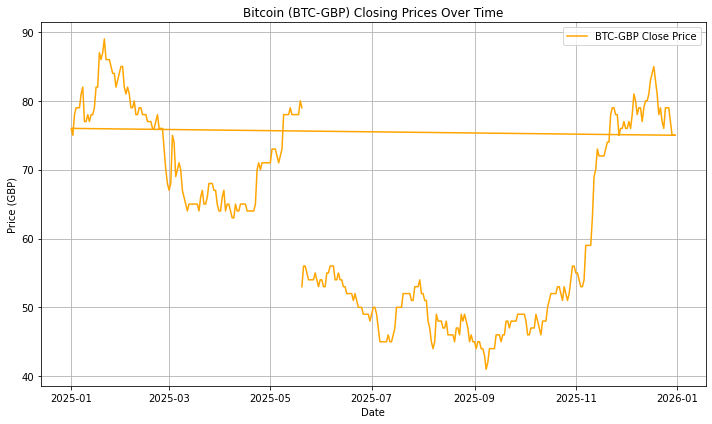

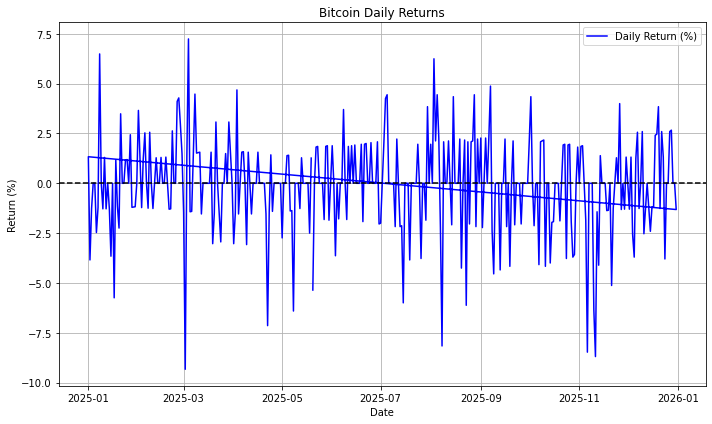

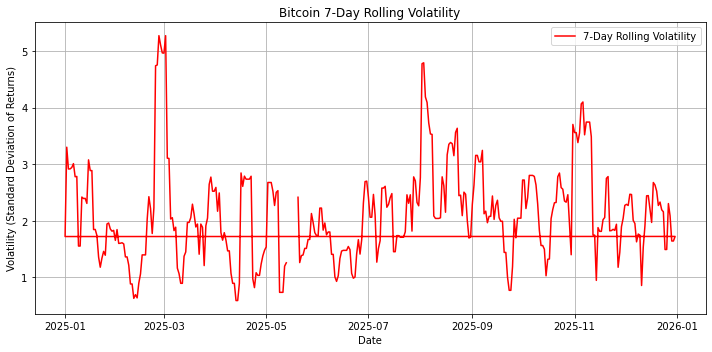

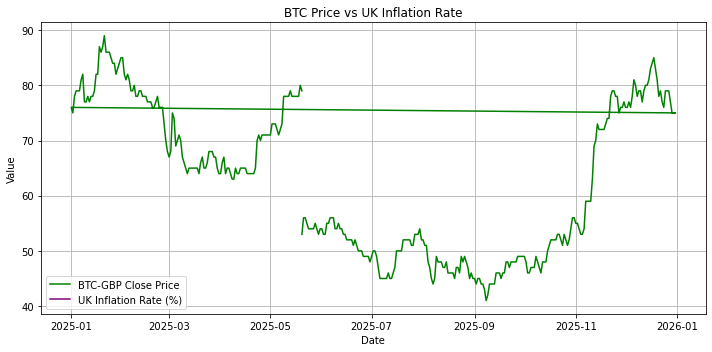


📉 Correlation between BTC Close and Inflation:
                Close  Inflation_Rate
Close             1.0             NaN
Inflation_Rate    NaN             NaN


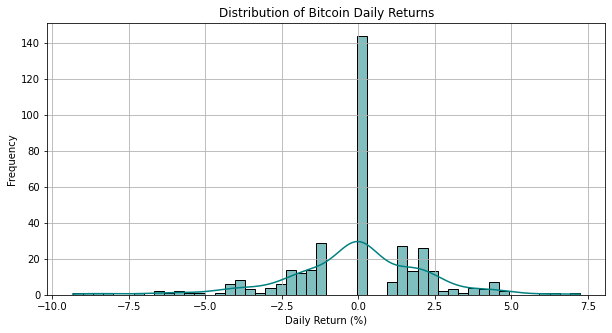

In [83]:
# Load merged dataset
merged_df = pd.read_csv('BTC_GBP_with_UK_Inflation.csv')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)

# Basic info and summary stats
print("📊 Dataset Info:")
print(merged_df.info())

print("\n📈 Summary Statistics:")
print(merged_df.describe())

print("\n❌ Missing Values:")
print(merged_df.isnull().sum())

# 2. Time Series Plot – BTC Price over time
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['Close'], label='BTC-GBP Close Price', color='orange')
plt.title('Bitcoin (BTC-GBP) Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (GBP)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#  Daily Returns Calculation and Volatility
merged_df['Daily_Returns'] = merged_df['Close'].pct_change() * 100
merged_df['Log_Returns'] = np.log(merged_df['Close'] / merged_df['Close'].shift(1)) * 100

# Plot daily returns
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['Daily_Returns'], label='Daily Return (%)', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Bitcoin Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#  Volatility (Standard Deviation of Returns)
merged_df['Rolling_Volatility'] = merged_df['Daily_Returns'].rolling(window=7).std()

plt.figure(figsize=(10, 5))
plt.plot(merged_df.index, merged_df['Rolling_Volatility'], label='7-Day Rolling Volatility', color='red')
plt.title('Bitcoin 7-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 5. Correlation with Inflation (if available)
if 'Annual_Inflation_Rate' in merged_df.columns:
    merged_df['Inflation_Rate'] = merged_df['Annual_Inflation_Rate'].ffill()  # Forward fill if needed

    plt.figure(figsize=(10, 5))
    plt.plot(merged_df.index, merged_df['Close'], label='BTC-GBP Close Price', color='green')
    plt.plot(merged_df.index, merged_df['Inflation_Rate'], label='UK Inflation Rate (%)', color='purple')
    plt.title('BTC Price vs UK Inflation Rate')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\n📉 Correlation between BTC Close and Inflation:")
    print(merged_df[['Close', 'Inflation_Rate']].corr())

# 6. Distribution of Returns
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['Daily_Returns'].dropna(), bins=50, kde=True, color='teal')
plt.title('Distribution of Bitcoin Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()